**Apache Parquet** or just Parquetis an open-souurce, column oriented file format that makes it faster to retrieve data and use sless memory space for tabuular data, than CSV.

It is very popular for big data repositories. 

The geospatial version of parquet for storing vector data is the **geoparquet**

This format comes from the necessity to have an efficient and standardized format to store big geospatial data efficiently. 

Introduced in decemeber 2022. 

## Catalog search
import all necessary libraries 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client 
import planetary_computer

import contextily as ctx

We use the 2020 US census collection id `us_censur` to look for the data in the MPC catalog

This collection has each tabular file as an item: 


In [2]:

# open MPC catalog 
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
#open MPC catalog
search = catalog.search(collections = ['us-census'])

#create dictionary with id and item


In [4]:
items = {item.id : item for item in search.items()}
#with brackets creting a dicitonary askign for each item in search items want key of dictionary to be item id and value of dicitonary to be item itself 

In [5]:
item = items['2020-cb_2020_us_county_500k']
item
#assets where item has data, has .parquet format

<Item id=2020-cb_2020_us_county_500k>

Notice each item has a signel asset 'data' this contains the URL to the geoparquet file holding the information. Lets access the items asset:

In [6]:
asset = item.assets['data']

In [7]:
asset

<Asset href=abfs://us-census/2020/cb_2020_us_county_500k.parquet>

#3 Open (geo) parquet 

To topen the parquet file we use the gpd.read_parquet() function using the assets URL pointing to the data:

In [8]:
counties = gpd.read_parquet(asset.href, storage_options = asset.extra_fields['table:storage_options'])

In [9]:
counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."
3,34,019,00882228,0500000US34019,34019,Hunterdon,Hunterdon County,NJ,New Jersey,06,1108086284,24761598,"POLYGON ((-75.19511 40.57969, -75.19466 40.581..."
4,21,147,00516926,0500000US21147,21147,McCreary,McCreary County,KY,Kentucky,06,1105416696,10730402,"POLYGON ((-84.77845 36.60329, -84.73068 36.665..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,08,014,01945881,0500000US08014,08014,Broomfield,Broomfield County,CO,Colorado,06,85386686,1502572,"MULTIPOLYGON (((-105.10667 39.95783, -105.1073..."
3230,08,121,00198176,0500000US08121,08121,Washington,Washington County,CO,Colorado,06,6521806795,15207397,"POLYGON ((-103.70655 39.73989, -103.70655 39.7..."
3231,27,037,00659464,0500000US27037,27037,Dakota,Dakota County,MN,Minnesota,06,1456967786,62978183,"POLYGON ((-93.32967 44.77948, -93.32962 44.791..."
3232,31,161,00835902,0500000US31161,31161,Sheridan,Sheridan County,NE,Nebraska,06,6321862270,74723228,"POLYGON ((-102.79287 42.82249, -102.79211 42.9..."


In [10]:
type(counties)

geopandas.geodataframe.GeoDataFrame

## Contextiley

This is a python library to add basemaps.
Retries tile maps from the internet and makes it possible to plot the, alongside our vector data.

**example**

We want to plot the santa barbara county polygon together with a basemap 

<Axes: >

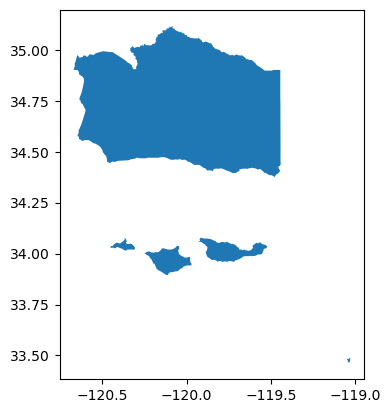

In [11]:
sb = counties[counties.NAME == "Santa Barbara"]
sb.plot()

Contexily tiles can be reprojected to amtch the CRS of our vector data, but...
it can be easier to reproejct your vector data to EPSG 3857 instead.

The crs epsg 3857 is a proejct CRS used for rendering maps online. For exmaple in google maps or openstreet maps. 

Text(0.5, 1.0, 'Santa Barbara County')

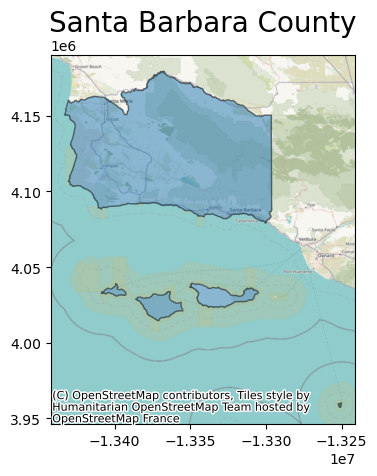

In [12]:
fig, ax = plt.subplots()

(sb.to_crs(epsg = 3857)
 .plot(ax=ax, figsize=(5,5), alpha = 0.5, edgecolor = 'k')
 )

# add basemap 
ctx.add_basemap(ax)

ax.set_title('Santa Barbara County', fontdict = {'fontsize':'20'})